# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [172]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import csv
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [173]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities = cities[0:500]


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [174]:
response_json = []
for city in cities:
    print("Getting weather data for {0}".format(city))
    target_url = ("http://api.openweathermap.org/data/2.5/weather?q={0}&appid={1}").format(city, api_key)
    response_json.append(requests.get(target_url).json())


Getting weather data for jamestown
Getting weather data for coahuayana
Getting weather data for kismayo
Getting weather data for avarua
Getting weather data for mataura
Getting weather data for haines junction
Getting weather data for salalah
Getting weather data for lompoc
Getting weather data for waipawa
Getting weather data for khani
Getting weather data for ushuaia
Getting weather data for hermanus
Getting weather data for hobart
Getting weather data for mairwa
Getting weather data for new norfolk
Getting weather data for chuy
Getting weather data for matveyevka
Getting weather data for albany
Getting weather data for severo-kurilsk
Getting weather data for mweka
Getting weather data for tuatapere
Getting weather data for bintulu
Getting weather data for puqi
Getting weather data for saint-joseph
Getting weather data for sao joao da barra
Getting weather data for punta arenas
Getting weather data for bluff
Getting weather data for karratha
Getting weather data for padang
Getting we

Getting weather data for arraial do cabo
Getting weather data for inza
Getting weather data for berbera
Getting weather data for tsihombe
Getting weather data for lodwar
Getting weather data for samalaeulu
Getting weather data for sakakah
Getting weather data for rio branco
Getting weather data for kuva
Getting weather data for nome
Getting weather data for port macquarie
Getting weather data for amuntai
Getting weather data for najran
Getting weather data for salisbury
Getting weather data for nantucket
Getting weather data for uva
Getting weather data for iqaluit
Getting weather data for bhag
Getting weather data for rio gallegos
Getting weather data for yangambi
Getting weather data for avon
Getting weather data for sistranda
Getting weather data for kahului
Getting weather data for pangnirtung
Getting weather data for lolua
Getting weather data for ruatoria
Getting weather data for moncao
Getting weather data for douentza
Getting weather data for fairbanks
Getting weather data for 

Getting weather data for abu kamal
Getting weather data for takaka
Getting weather data for fort myers beach
Getting weather data for deputatskiy
Getting weather data for champerico
Getting weather data for boguchany
Getting weather data for roma
Getting weather data for thabazimbi
Getting weather data for am timan
Getting weather data for aksha
Getting weather data for kaili
Getting weather data for pisco
Getting weather data for arman
Getting weather data for mint hill
Getting weather data for san ramon
Getting weather data for adrar
Getting weather data for oistins
Getting weather data for koumac
Getting weather data for linapacan


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [175]:
from pandas.io.json import json_normalize 
result = json_normalize(response_json)
result.rename(
    columns={
        "coord.lat": "latitude",
        "coord.lon": "longitude",
        "main.humidity": "humidity",
        "wind.speed": "windspeed",
        "main.temp": "temperature",
        "clouds.all": "cloudiness",
    },
    inplace=True
)
result.to_csv(output_data_file)
print(result.head(5))

df = result.loc[:, ['latitude', 'humidity', 'windspeed', 'temperature', 'cloudiness']]
print(df.head(2))


       base  cloudiness  cod  latitude  longitude            dt         id  \
0  stations         0.0  200    -33.21     138.60  1.562640e+09  2069194.0   
1  stations        24.0  200     18.62    -100.35  1.562640e+09  3981460.0   
2       NaN         NaN  404       NaN        NaN           NaN        NaN   
3  stations         0.0  200    -21.21    -159.78  1.562640e+09  4035715.0   
4  stations       100.0  200    -46.19     168.86  1.562640e+09  6201424.0   

   main.grnd_level  humidity  main.pressure  ...  sys.message   sys.sunrise  \
0           983.98      59.0        1020.83  ...       0.0072  1.562623e+09   
1           949.30      72.0        1014.87  ...       0.0078  1.562588e+09   
2              NaN       NaN            NaN  ...          NaN           NaN   
3              NaN      78.0        1014.00  ...       0.0070  1.562606e+09   
4              NaN      77.0        1006.00  ...       0.0080  1.562618e+09   

     sys.sunset  sys.type timezone visibility  \
0  1.56

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

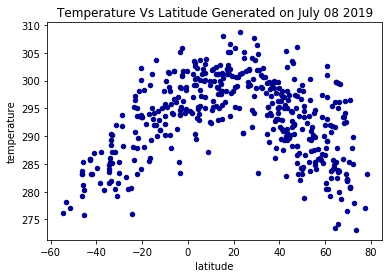

In [176]:
today = pd.datetime.now().strftime("%B %d %Y")
ax = result.plot.scatter(x="latitude", y="temperature", c="DarkBlue")
ax.set_title("Temperature Vs Latitude Generated on {0}".format(today)).get_figure().savefig("output_data/latitude_temp.png")


#### Latitude vs. Humidity Plot

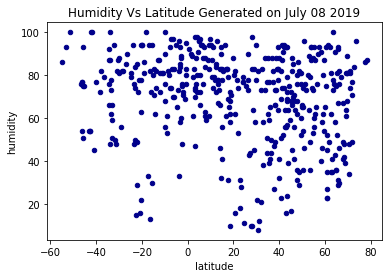

In [177]:
ax = result.plot.scatter(x="latitude", y="humidity", c="DarkBlue")
ax.set_title("Humidity Vs Latitude Generated on {0}".format(today)).get_figure().savefig("output_data/humidity_temp.png")


#### Latitude vs. Cloudiness Plot

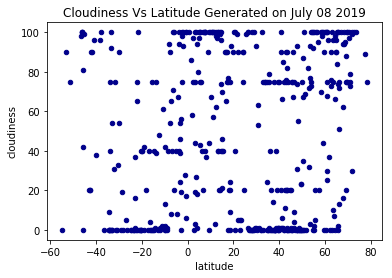

In [178]:
ax = result.plot.scatter(x="latitude", y="cloudiness", c="DarkBlue")
ax.set_title("Cloudiness Vs Latitude Generated on {0}".format(today)).get_figure().savefig("output_data/cloudiness_temp.png")


#### Latitude vs. Wind Speed Plot

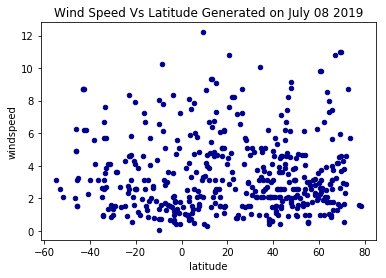

In [179]:
ax = result.plot.scatter(x="latitude", y="windspeed", c="DarkBlue")
ax.set_title("Wind Speed Vs Latitude Generated on {0}".format(today)).get_figure().savefig("output_data/windspeed_temp.png")


In [180]:
"""
Observations:

1. As one approaches the Equator, temperature increases.
2. Windspeed is usually in the lower values from 20S to 60N latitude values.
3. More cloudier from 40N to 60N latitude values.
"""

'\nObservations:\n\n1. As one approaches the Equator, temperature increases.\n2. Windspeed is usually in the lower values from 20S to 60N latitude values.\n3. More cloudier from 40N to 60N latitude values.\n'